## Modelo Preditivo

In [124]:
specific_columns = ['PESSOA_PIPEDRIVE_has_notes', 'WHOQOL_Físico_New', 'WHOQOL_Psicológico_New', 'WHOQOL_Social_New', 'COMUNICARE_Problemas Abertos Bool', 'TWILIO_Data Última Mensagens Inbound Recente', 'stay_time', 'last_stage_concluded', 'process_time', 'TWILIO_Data Última Mensagens Outbound Recente', 'TWILIO_Data Última Ligações Outbound Recente']

PENDENTE: FEATURE ENGINEERING

PESSOA_PIPEDRIVE_has_notes até TWILIO_Data Última Ligações Outbound Recente

In [125]:
import pandas as pd

data = pd.read_csv("../scripts/data-preprocessed.csv")
data = data[specific_columns]  # Manter apenas as colunas específicas

In [126]:

import numpy as np

# Tratar valores ausentes
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == np.number:
            data[column].fillna(data[column].median(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)


In [127]:
data.shape[1]

11

In [128]:
import missingno as msno

<AxesSubplot:>

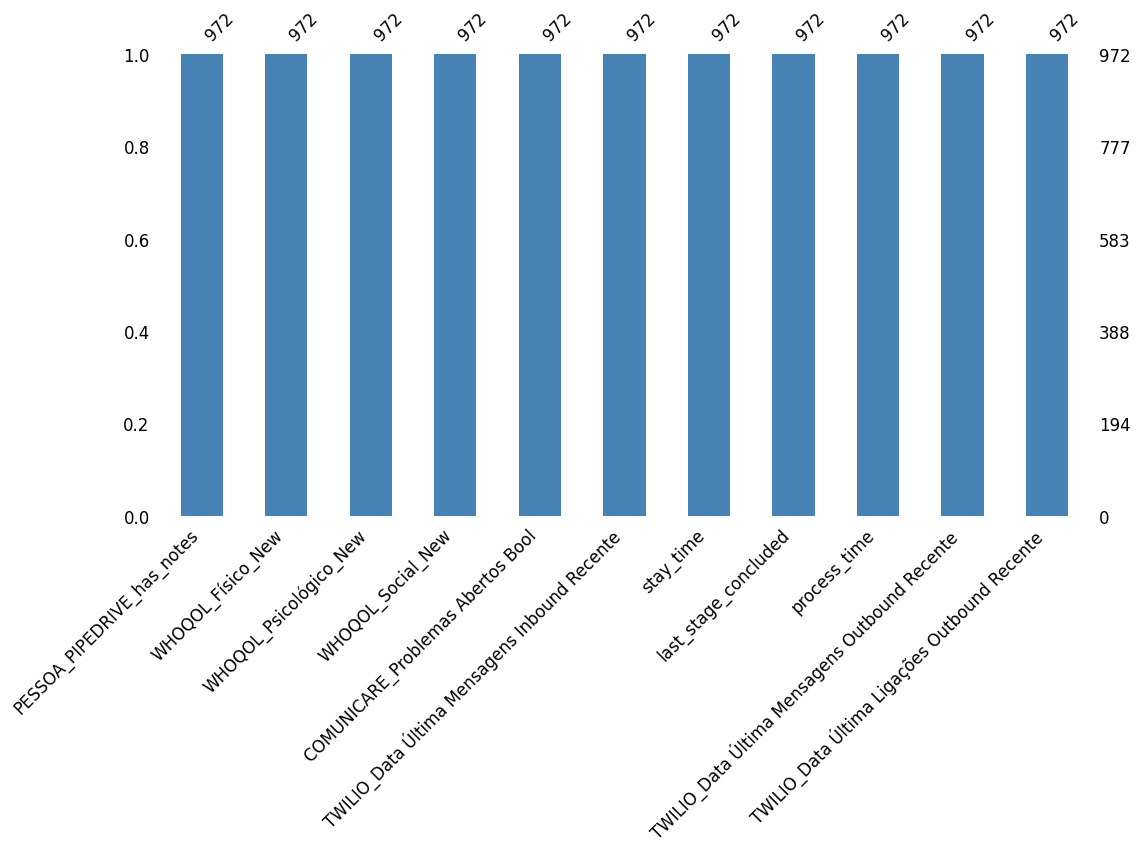

In [129]:
msno.bar(data.iloc[:, :], figsize=(12, 6), fontsize=12, color='steelblue')

## Featuere Engineering

### PESSOA_PIPEDRIVE_has_notes

- PESSOA_PIPEDRIVE_has_notes: 0 ou 1

In [130]:
data['PESSOA_PIPEDRIVE_has_notes'].value_counts()

1    559
0    413
Name: PESSOA_PIPEDRIVE_has_notes, dtype: int64

Feature Engineering: Como é uma variável binária (0 ou 1), verificar a distribuição dos valores para entender a proporcionalidade. Se houver um desequilíbrio significativo, pode-se considerar técnicas de reamostragem ou ponderação para balancear a influência dessa feature no modelo.

In [131]:
from sklearn.utils import resample


# Verificando a distribuição da variável 'PESSOA_PIPEDRIVE_has_notes'
distribution = data['PESSOA_PIPEDRIVE_has_notes'].value_counts(normalize=True)
print("Distribuição original:")
print(distribution)

# Código para reamostragem ou ponderação, se necessário
# Checando se há desequilíbrio significativo
if distribution.min() < 0.4:  # Supondo um limite de 40% para considerar desequilíbrio
    # Separando as classes
    class_0 = data[data['PESSOA_PIPEDRIVE_has_notes'] == 0]
    class_1 = data[data['PESSOA_PIPEDRIVE_has_notes'] == 1]

    # Reamostrando a classe minoritária
    class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=123)
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['PESSOA_PIPEDRIVE_has_notes'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")


Distribuição original:
1    0.575103
0    0.424897
Name: PESSOA_PIPEDRIVE_has_notes, dtype: float64

Não é necessário balanceamento.


### ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente

- ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente:


In [132]:
# data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente']

In [133]:
# data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].value_counts()

Feature Engineering: Se essa feature representa datas, pode-se converter para um formato numérico, como o número de dias desde uma data de referência. Também seria útil criar features derivadas, como mês, dia da semana, ou intervalos desde a última sessão.

In [134]:

# Análise da Distribuição
# distribution = data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].value_counts(normalize=True)
# print("Distribuição dos valores booleanos:")
# print(distribution)

# Conversão para Valores Numéricos
# data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] = data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].astype(int)

# Verificando os primeiros registros após a conversão
# print("\nDados após a conversão para numérico:")
# print(data[['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente', 'ATENDIMENTOS_AGENDA_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


In [135]:
# Verificando a distribuição da variável convertida
# distribution = data['ATENDIMENTOS_AGENDA_Boolean_Numeric'].value_counts(normalize=True)
# print("Distribuição após conversão para numérico:")
# print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
# class_0 = data[data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] == 0]
# class_1 = data[data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
# if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
#     class_1_upsampled = resample(class_1,
#                                  replace=True,     # amostra com substituição
#                                  n_samples=len(class_0),    # para igualar com a classe majoritária
#                                  random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    # data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
#     new_distribution = data_balanced['ATENDIMENTOS_AGENDA_Boolean_Numeric'].value_counts(normalize=True)
#     print("\nDistribuição após reamostragem:")
#     print(new_distribution)
# else:
#     print("\nNão é necessário balanceamento.")




### WHOQOL_Fisico_New

- WHOQOL_Fisico_New: 

In [136]:
# Verificando a natureza da variável WHOQOL_Fisico_New
print(data['WHOQOL_Físico_New'].head())

0    4.0
1    3.0
2    2.0
3    3.9
4    3.7
Name: WHOQOL_Físico_New, dtype: float64


In [137]:
data['WHOQOL_Físico_New']

0      4.0
1      3.0
2      2.0
3      3.9
4      3.7
      ... 
967    3.7
968    2.9
969    3.7
970    3.7
971    3.7
Name: WHOQOL_Físico_New, Length: 972, dtype: float64

In [138]:
data['WHOQOL_Físico_New'].value_counts()

3.7    290
4.1     63
3.9     60
3.6     58
4.0     56
4.3     54
3.3     53
3.4     51
3.0     45
3.1     38
2.9     31
4.6     30
4.4     27
2.7     26
4.7     24
4.9     13
2.3     13
2.6      9
5.0      8
2.0      6
2.4      6
2.1      4
1.6      3
1.7      2
1.4      1
1.3      1
Name: WHOQOL_Físico_New, dtype: int64

Feature Engineering: A natureza desta feature não está clara. Se for uma variável categórica, a codificação one-hot ou ordinal pode ser aplicada. Se for numérica, verificar a distribuição e aplicar normalização ou padronização, se necessário.

In [139]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Verificando a natureza da variável WHOQOL_Fisico_New
print(data['WHOQOL_Físico_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Físico_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Físico_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Físico_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Físico_New'] = scaler.fit_transform(data[['WHOQOL_Físico_New']])

# Exibindo as primeiras linhas do dataset após o tratamento
print(data['WHOQOL_Físico_New'].head())


0    4.0
1    3.0
2    2.0
3    3.9
4    3.7
Name: WHOQOL_Físico_New, dtype: float64
0    0.571370
1   -1.141682
2   -2.854734
3    0.400065
4    0.057454
Name: WHOQOL_Físico_New, dtype: float64


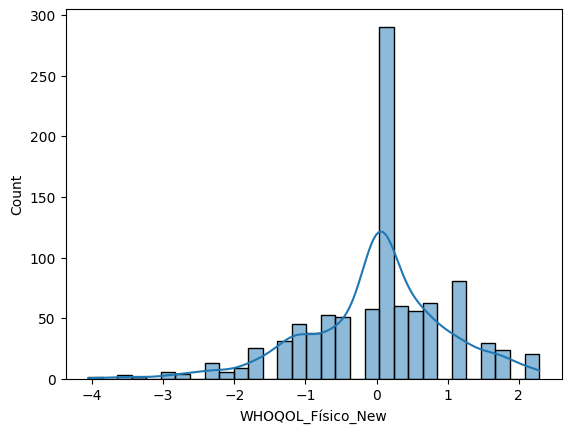

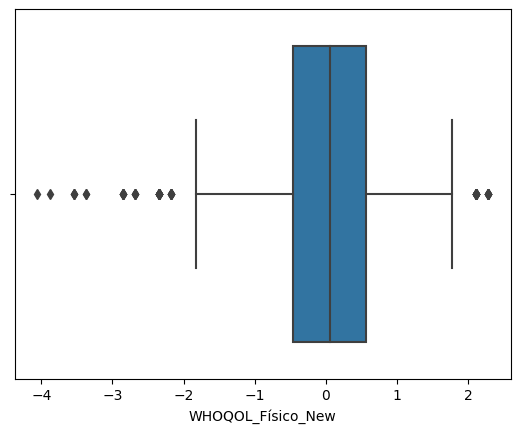

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

# Analisando a distribuição da variável
sns.histplot(data['WHOQOL_Físico_New'], kde=True)
plt.show()

# Verificando a presença de outliers
sns.boxplot(x=data['WHOQOL_Físico_New'])
plt.show()


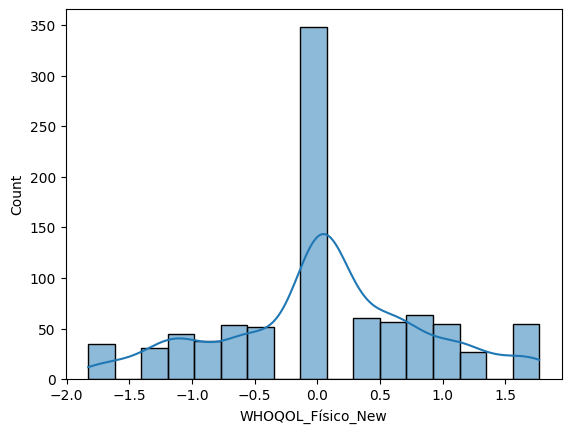

In [141]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Físico_New'].quantile(0.25)
Q3 = data['WHOQOL_Físico_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Físico_New'] >= Q1 - 1.5 * IQR) & (data['WHOQOL_Físico_New'] <= Q3 + 1.5 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Físico_New'], kde=True)
plt.show()

### WHOQOL_Psicológico_New

- WHOQOL_Psicológico_New:

In [142]:
data['WHOQOL_Psicológico_New']

0      4.0
1      3.0
3      3.8
4      3.5
5      3.5
      ... 
967    3.5
968    2.0
969    3.5
970    4.0
971    3.5
Name: WHOQOL_Psicológico_New, Length: 915, dtype: float64

In [143]:
data['WHOQOL_Psicológico_New'].value_counts()

4.0    249
3.5    247
3.0    206
2.0     39
5.0     31
3.8     19
3.7     19
3.3     18
3.2     13
2.8     12
4.5      9
4.2      9
2.5      8
2.3      8
2.7      8
4.3      8
2.2      4
1.5      3
1.8      2
1.7      1
1.0      1
4.7      1
Name: WHOQOL_Psicológico_New, dtype: int64

Feature Engineering: Semelhante ao WHOQOL_Fisico_New, a abordagem depende do tipo de dado. Para dados categóricos, aplicar codificação adequada; para dados numéricos, considerar normalização e detecção de outliers.

0    4.0
1    3.0
3    3.8
4    3.5
5    3.5
Name: WHOQOL_Psicológico_New, dtype: float64


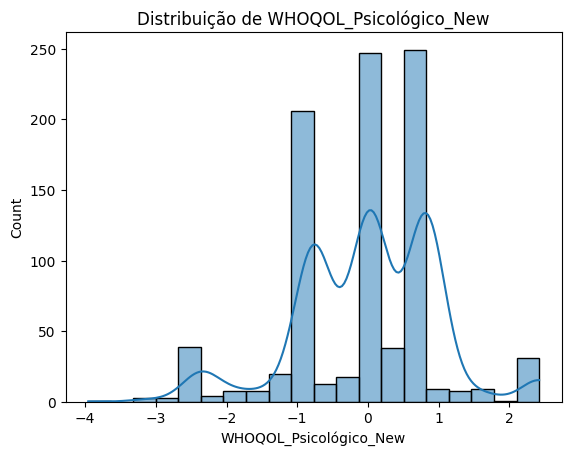

Índices de outliers: (array([198, 290, 492, 507]),)


In [144]:
# Verificando a natureza da variável WHOQOL_Psicológico_New
from scipy import stats


print(data['WHOQOL_Psicológico_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Psicológico_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Psicológico_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Psicológico_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Psicológico_New'] = scaler.fit_transform(data[['WHOQOL_Psicológico_New']])

    # Análise de distribuição e detecção de outliers
    sns.histplot(data['WHOQOL_Psicológico_New'], bins=20, kde=True)
    plt.title('Distribuição de WHOQOL_Psicológico_New')
    plt.show()

    # Detecção de outliers
    z_scores = np.abs(stats.zscore(data['WHOQOL_Psicológico_New']))
    outliers = np.where(z_scores > 3)  # Limiar de 3 para outliers
    print(f"Índices de outliers: {outliers}")


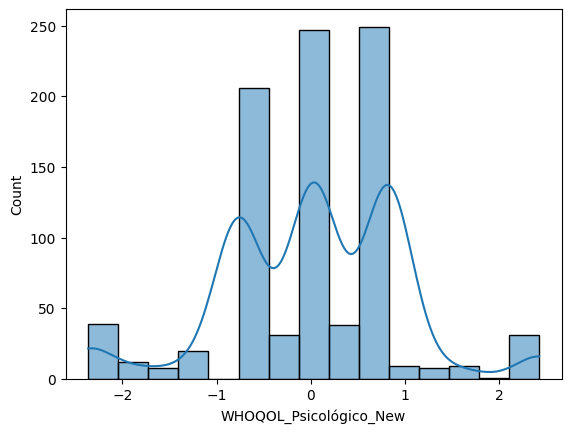

In [145]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Psicológico_New'].quantile(0.25)
Q3 = data['WHOQOL_Psicológico_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Psicológico_New'] >= Q1 - 1 * IQR) & (data['WHOQOL_Psicológico_New'] <= Q3 + 1 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Psicológico_New'], kde=True)
plt.show()


### WHOQOL_Social_New

- WHOQOL_Social_New:

In [146]:
data['WHOQOL_Social_New']

0      4.0
1      4.0
3      4.3
4      4.0
5      4.0
      ... 
967    4.0
968    3.0
969    4.0
970    4.0
971    4.0
Name: WHOQOL_Social_New, Length: 908, dtype: float64

In [147]:
data['WHOQOL_Social_New'].value_counts()

4.0    498
3.0    195
5.0     70
2.0     32
3.7     28
3.3     23
4.3     17
4.7     16
2.7     13
2.3     10
1.3      3
1.7      2
1.0      1
Name: WHOQOL_Social_New, dtype: int64

Feature Engineering: Assumindo uma natureza semelhante às outras variáveis WHOQOL, aplicar as mesmas técnicas conforme apropriado ao tipo de dados (categórico ou numérico).

0    4.0
1    4.0
3    4.3
4    4.0
5    4.0
Name: WHOQOL_Social_New, dtype: float64


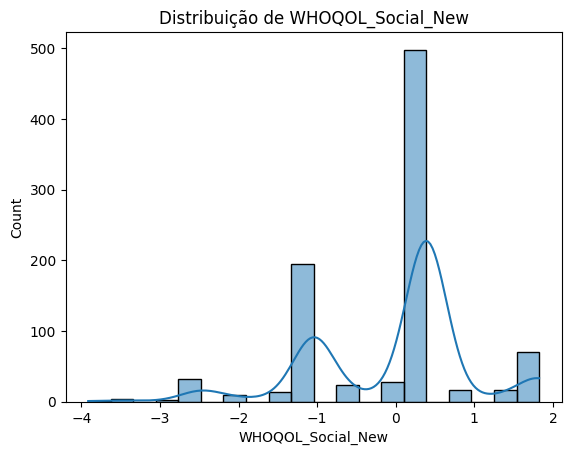

Índices de outliers: (array([240, 365, 500, 748]),)


In [148]:
from scipy import stats
import numpy as np


# Verificando a natureza da variável WHOQOL_Social_New
print(data['WHOQOL_Social_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Social_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Social_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Social_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Social_New'] = scaler.fit_transform(data[['WHOQOL_Social_New']])

    # Análise de distribuição e detecção de outliers
    sns.histplot(data['WHOQOL_Social_New'], bins=20,kde=True)
    plt.title('Distribuição de WHOQOL_Social_New')
    plt.show()

    # Detecção de outliers
    z_scores = np.abs(stats.zscore(data['WHOQOL_Social_New']))
    outliers = np.where(z_scores > 3)  # Limiar de 3 para outliers
    print(f"Índices de outliers: {outliers}")


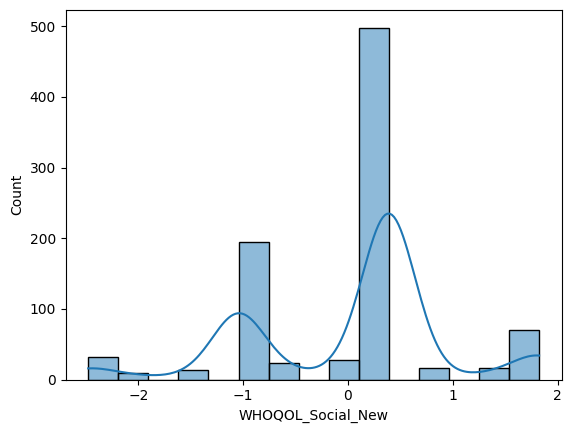

In [149]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Social_New'].quantile(0.25)
Q3 = data['WHOQOL_Social_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Social_New'] >= Q1 - 1 * IQR) & (data['WHOQOL_Social_New'] <= Q3 + 1 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Social_New'], kde=True)
plt.show()


### COMUNICARE_Problemas Abertos Bool
- COMUNICARE_Problemas Abertos Bool

In [150]:
data['COMUNICARE_Problemas Abertos Bool']

0      0
1      1
3      1
4      0
5      0
      ..
967    0
968    1
969    0
970    0
971    0
Name: COMUNICARE_Problemas Abertos Bool, Length: 902, dtype: int64

In [151]:
data['COMUNICARE_Problemas Abertos Bool'].value_counts()

1    461
0    441
Name: COMUNICARE_Problemas Abertos Bool, dtype: int64

Feature Engineering: Como é uma variável binária, similar à feature PESSOA_PIPEDRIVE_has_notes, verificar a distribuição dos valores e aplicar técnicas de balanceamento se necessário.

In [152]:
from sklearn.utils import resample

# Verificando a distribuição dos valores
distribution = data['COMUNICARE_Problemas Abertos Bool'].value_counts(normalize=True)
print("Distribuição dos valores:")
print(distribution)

# Reamostragem para balancear as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['COMUNICARE_Problemas Abertos Bool'] == False]
class_1 = data[data['COMUNICARE_Problemas Abertos Bool'] == True]

# Checando se o balanceamento é necessário (por exemplo, limiar de 40%)
if distribution.min() < 0.4:
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['COMUNICARE_Problemas Abertos Bool'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")

Distribuição dos valores:
1    0.511086
0    0.488914
Name: COMUNICARE_Problemas Abertos Bool, dtype: float64

Não é necessário balanceamento.


### TWILIO_Data Última Mensagens Inbound Recente

- TWILIO_Data Última Mensagens Inbound Recente

In [153]:
data['TWILIO_Data Última Mensagens Inbound Recente']

0      False
1       True
3       True
4      False
5      False
       ...  
967    False
968    False
969    False
970    False
971    False
Name: TWILIO_Data Última Mensagens Inbound Recente, Length: 902, dtype: bool

In [154]:
data['TWILIO_Data Última Mensagens Inbound Recente'].value_counts()

False    470
True     432
Name: TWILIO_Data Última Mensagens Inbound Recente, dtype: int64

Feature Engineering: Converter datas para um formato numérico, como o número de dias desde uma data de referência. Pode-se criar features derivadas como dia da semana, mês, e talvez tempo desde a última mensagem.

In [155]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Mensagens Inbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Mensagens Inbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Mensagens Inbound Recente', 'TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.521064
True     0.478936
Name: TWILIO_Data Última Mensagens Inbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Mensagens Inbound Recente  \
0                                         False   
1                                          True   
3                                          True   
4                                         False   
5                                         False   

   TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric  
0                                                  0             
1                                                  1             
3                                                  1             
4                                                  0             
5                                                  0             


In [156]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
0    0.521064
1    0.478936
Name: TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric, dtype: float64

Não é necessário balanceamento.


### stay_time

- Stay_time:

In [157]:
data['stay_time']

0       211 days
1       456 days
3       840 days
4       224 days
5       414 days
         ...    
967    Em aberto
968    Em aberto
969    Em aberto
970    Em aberto
971    Em aberto
Name: stay_time, Length: 902, dtype: object

In [158]:
data['stay_time'].value_counts()

Em aberto    501
91 days       13
152 days      12
30 days       11
90 days       11
            ... 
195 days       1
46 days        1
125 days       1
230 days       1
34 days        1
Name: stay_time, Length: 176, dtype: int64

Feature Engineering: Se esta feature representa a duração, verificar a sua distribuição e aplicar transformações, como log-transform, se houver uma distribuição muito enviesada. Normalização ou padronização também podem ser úteis.

### last_stage_concluded

- last_stage_concluded:

In [159]:
data['last_stage_concluded']

0          Questionário
1          Questionário
3          Questionário
4          Questionário
5          Questionário
             ...       
967         Boas-vindas
968    Primeira reunião
969         Boas-vindas
970         Boas-vindas
971         Boas-vindas
Name: last_stage_concluded, Length: 902, dtype: object

In [160]:
data['last_stage_concluded'].value_counts()

Questionário        654
Boas-vindas         166
Primeira reunião     50
Não iniciado         32
Name: last_stage_concluded, dtype: int64

Feature Engineering: Se for uma variável categórica indicando diferentes estágios, a codificação one-hot ou ordinal pode ser aplicada. Se for uma variável temporal, seguir uma abordagem semelhante à da feature TWILIO_Data.

In [161]:

# Aplicando codificação one-hot
data_encoded = pd.get_dummies(data['last_stage_concluded'], columns=['last_stage_concluded'], prefix='stage')
print(data_encoded)


     stage_Boas-vindas  stage_Não iniciado  stage_Primeira reunião  \
0                    0                   0                       0   
1                    0                   0                       0   
3                    0                   0                       0   
4                    0                   0                       0   
5                    0                   0                       0   
..                 ...                 ...                     ...   
967                  1                   0                       0   
968                  0                   0                       1   
969                  1                   0                       0   
970                  1                   0                       0   
971                  1                   0                       0   

     stage_Questionário  
0                     1  
1                     1  
3                     1  
4                     1  
5                     1  
.. 

### process_time

- process_time:

In [162]:
data['process_time']

0      2022-04-19 15:19:40
1      2022-06-27 15:03:30
3      2022-05-05 13:14:01
4      2022-02-07 03:00:00
5      2022-04-28 03:00:00
              ...         
967              Em aberto
968              Em aberto
969              Em aberto
970              Em aberto
971              Em aberto
Name: process_time, Length: 902, dtype: object

In [163]:
data['process_time'].value_counts()

Em aberto              95
Não iniciado           32
2023-09-04 00:00:00    15
2023-04-25 11:53:56     4
2023-04-25 11:53:57     4
                       ..
2022-06-09 17:39:29     1
2022-08-30 13:40:12     1
2022-06-06 23:05:07     1
2022-06-22 15:26:16     1
2023-11-08 11:46:50     1
Name: process_time, Length: 723, dtype: int64

Feature Engineering: Similar à feature stay_time, aplicar transformações apropriadas com base na distribuição dos dados. Se for uma medida de tempo, verificar se há outliers e lidar com eles adequadamente.

In [164]:
# Convertendo a coluna 'process_time' para datetime e tratando valores inválidos
data['process_time'] = pd.to_datetime(data['process_time'], errors='coerce')

# Defina a data de referência adequada (substitua 'data_de_referencia' pela data real)
data_de_referencia = pd.to_datetime('2022-01-01')

# Calculando o tempo decorrido em dias desde a data de referência
data['days_since_reference_date'] = (data['process_time'] - data_de_referencia).dt.days

print(data[['process_time', 'days_since_reference_date']])


           process_time  days_since_reference_date
0   2022-04-19 15:19:40                      108.0
1   2022-06-27 15:03:30                      177.0
3   2022-05-05 13:14:01                      124.0
4   2022-02-07 03:00:00                       37.0
5   2022-04-28 03:00:00                      117.0
..                  ...                        ...
967                 NaT                        NaN
968                 NaT                        NaN
969                 NaT                        NaN
970                 NaT                        NaN
971                 NaT                        NaN

[902 rows x 2 columns]


In [165]:
# Preencher com um Valor Padrão: Você pode preencher os valores NaT com um valor padrão, como -1, para indicar que essas entradas não têm data válida.

#data['days_since_reference_date'].fillna(-1, inplace=True)


In [166]:
#Remover Linhas com Valores NaT: Se essas entradas não forem relevantes para sua análise, você pode optar por remover as linhas com valores NaT.

data.dropna(subset=['days_since_reference_date'], inplace=True)


In [167]:
print(data[['process_time', 'days_since_reference_date']])

           process_time  days_since_reference_date
0   2022-04-19 15:19:40                      108.0
1   2022-06-27 15:03:30                      177.0
3   2022-05-05 13:14:01                      124.0
4   2022-02-07 03:00:00                       37.0
5   2022-04-28 03:00:00                      117.0
..                  ...                        ...
949 2023-10-31 19:42:24                      668.0
952 2023-10-31 12:40:43                      668.0
954 2023-11-06 19:50:59                      674.0
956 2023-11-01 11:34:05                      669.0
958 2023-11-08 11:46:50                      676.0

[775 rows x 2 columns]


### TWILIO_Data Última Mensagens Outbound Recente

- TWILIO_Data Última Mensagens Outbound Recente

In [168]:
data['TWILIO_Data Última Mensagens Outbound Recente']

0       True
1       True
3       True
4      False
5      False
       ...  
949     True
952     True
954     True
956     True
958     True
Name: TWILIO_Data Última Mensagens Outbound Recente, Length: 775, dtype: bool

In [169]:
data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts()

False    393
True     382
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: int64

Feature Engineering: Similar à feature de mensagens inbound, esta também deve ser convertida para um formato numérico, como o número de dias desde uma data de referência. Seria útil também criar features derivadas, como dia da semana, mês, e talvez o intervalo de tempo desde a última mensagem outbound.


In [170]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Mensagens Outbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Mensagens Outbound Recente', 'TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.507097
True     0.492903
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Mensagens Outbound Recente  \
0                                           True   
1                                           True   
3                                           True   
4                                          False   
5                                          False   

   TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric  
0                                                  1              
1                                                  1              
3                                                  1              
4                                                  0              
5                                                  0              


In [171]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
False    0.507097
True     0.492903
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: float64

Não é necessário balanceamento.


### TWILIO_Data Última Ligações Outbound Recente

- TWILIO_Data Última Ligações Outbound Recente

In [172]:
data['TWILIO_Data Última Ligações Outbound Recente']

0       True
1      False
3      False
4      False
5      False
       ...  
949    False
952    False
954    False
956    False
958    False
Name: TWILIO_Data Última Ligações Outbound Recente, Length: 775, dtype: bool

In [173]:
data['TWILIO_Data Última Ligações Outbound Recente'].value_counts()

False    594
True     181
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: int64

Feature Engineering: Assim como as outras features relacionadas a datas, converter para um formato numérico que represente a temporalidade da feature, como dias desde uma data de referência. Pode-se também criar features derivadas que capturem aspectos temporais específicos, como hora do dia, dia da semana, ou tempo desde a última ligação outbound.

In [174]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Ligações Outbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Ligações Outbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Ligações Outbound Recente', 'TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.766452
True     0.233548
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Ligações Outbound Recente  \
0                                          True   
1                                         False   
3                                         False   
4                                         False   
5                                         False   

   TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric  
0                                                  1             
1                                                  0             
3                                                  0             
4                                                  0             
5                                                  0             


In [175]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Ligações Outbound Recente'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
False    0.766452
True     0.233548
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: float64

Distribuição após reamostragem:
0    0.5
1    0.5
Name: TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric, dtype: float64


### GRAFICO DE CORRELAÇÃO

/var/folders/cd/1cl217ws7w7fdp_b1kp0j_lh0000gn/T/ipykernel_78832/716233708.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


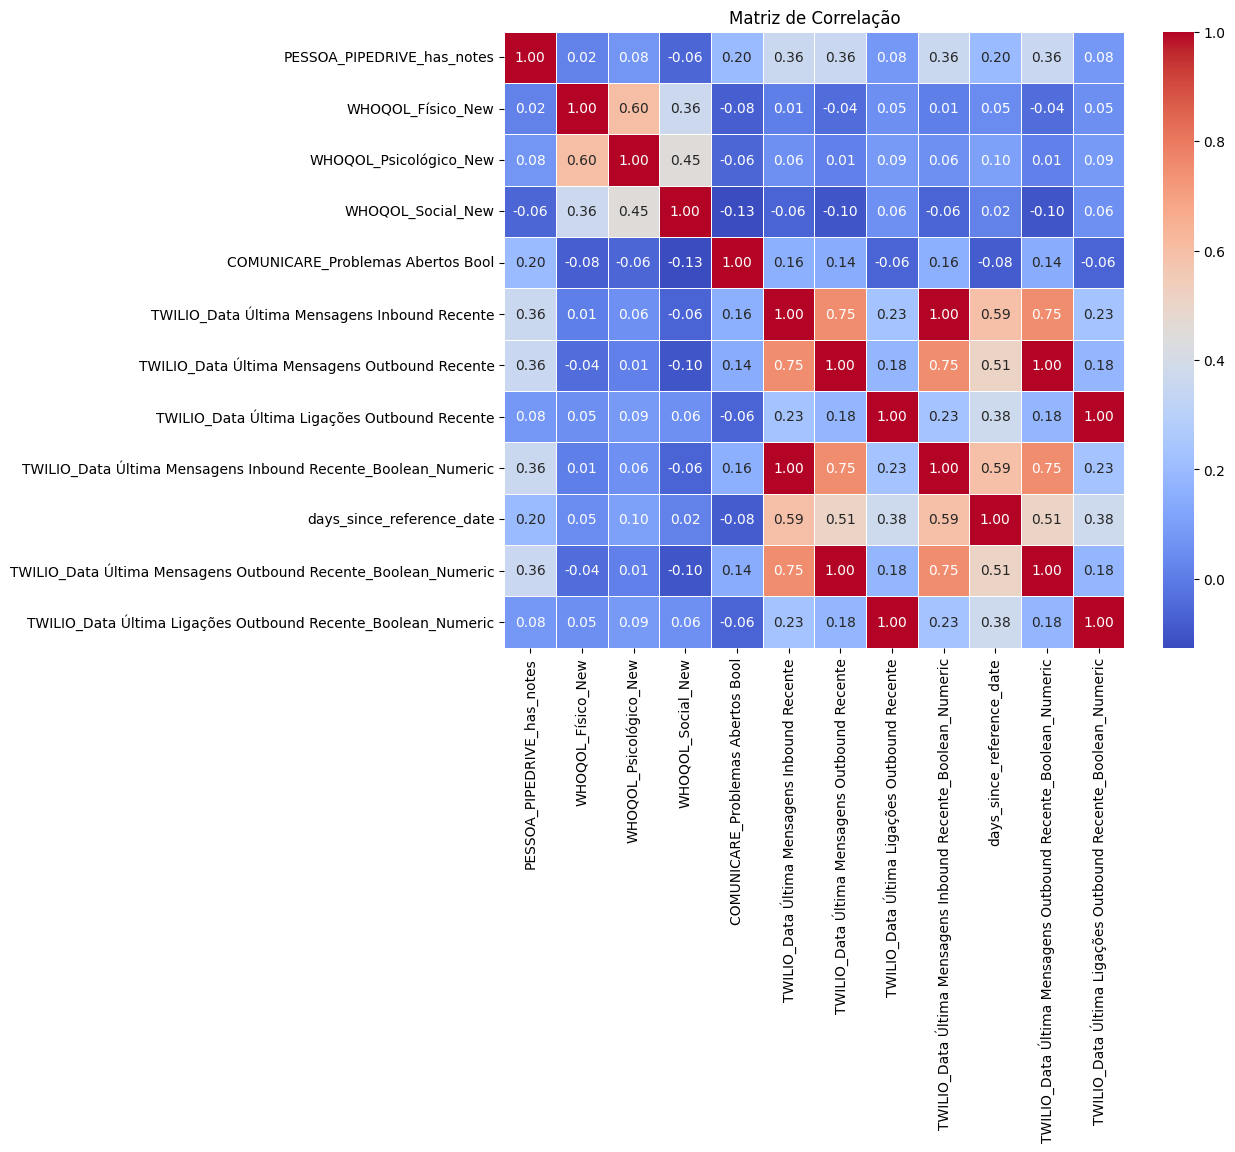

In [176]:

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()
